<center><h1> Parameterized Mass </h1>
John Ignacio R.M. 9 AGO 2020</center>

In [1]:
import numpy as np
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
from ada2.model import BinClassifModelV1 as BC1
from ada2.data import read_dataset, split_dataset_bymass
from ada2.plot import plot_confidence_matrix
import pandas as pd
from IPython.core.display import display, HTML

Using TensorFlow backend.
Welcome to JupyROOT 6.20/04


In [2]:
source_path = "../processed_data/xtohh"
masses = [1000, 1200, 1400, 1600, 1800, 2000, 2500, 3000]
signal = "Xtohh"
bg = "Xtohh_background"
seed = 420

In [3]:
#read xtohh dataset SR region tag 2
dfs = {mass: read_dataset(source_path, signal+str(mass), bg, "SR", 2) for mass in masses}

In [4]:
df = pd.concat(dfs, names = ["mass", None])
df = df.reset_index(level = 0).reset_index(drop = True)
df

,mass,EventWeight,label,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,1000,0.000457,1,498.51450,-0.536601,-2.818808,119716.39,447.70572,-1.163481,1.234735,97467.300,2.229642,2.316092,0.605876,71.701860,927.69910,419.146580
1,1000,0.000348,1,549.95325,-1.375417,1.734355,121275.48,302.23140,-1.598841,-1.238216,96785.600,2.972570,2.980955,-0.169232,84.821130,846.36835,257.105600
2,1000,0.000591,1,513.64594,0.340504,-2.402172,134068.61,362.13004,-0.013702,0.731264,100451.040,3.133436,3.153392,0.193749,81.100680,907.06665,151.556750
3,1000,0.000620,1,483.49622,-1.430659,-0.469333,111137.67,410.57037,-1.323875,2.663501,105842.830,3.132834,3.134654,0.164603,64.795180,918.62680,73.030174
4,1000,0.000562,1,456.22528,-0.444622,0.358149,165661.98,363.99133,-0.550266,-2.998335,94892.640,2.926702,2.928608,-0.206495,151.079830,853.51350,127.067240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50838,3000,0.006433,0,402.06714,0.109710,-1.277847,68576.34,486.71262,-0.060529,1.469456,120999.410,2.747302,2.752572,-0.883233,84.210686,891.92240,192.862270
50839,3000,0.004849,0,542.29900,1.579771,-2.624035,84161.26,411.07132,1.205967,0.438185,56194.777,3.062220,3.084951,-0.216563,59.169407,970.41110,136.471160
50840,3000,0.004849,0,548.63104,-0.033452,2.621298,79095.04,416.03915,0.336025,-0.553298,70408.830,3.108589,3.130470,-0.352454,34.371227,983.20233,133.526060
50841,3000,0.007816,0,683.98340,-0.029910,-0.760806,110728.80,609.47140,0.094448,2.401307,148632.220,3.121072,3.123549,0.351719,55.616740,1320.47700,75.680750


In [5]:
sets = split_dataset_bymass(df, 0.6, 0.2, 0.2, seed, masses)

In [6]:
x_train, x_val, x_test = sets["x"].values()
y_train, y_val, y_test = sets["y"].values()
w_train, w_val, w_test = sets["w"].values()
print(x_train.shape, x_val.shape, x_test.shape)

(30500, 15) (10170, 15) (10173, 15)


Train on 30500 samples, validate on 10170 samples
Epoch 1/50
30500/30500 [==============================] - 4s 135us/step - loss: 0.0016 - val_loss: 7.3999e-04
Epoch 2/50
30500/30500 [==============================] - 4s 117us/step - loss: 7.3600e-04 - val_loss: 6.1199e-04
Epoch 3/50
30500/30500 [==============================] - 4s 118us/step - loss: 6.9873e-04 - val_loss: 5.8110e-04
Epoch 4/50
30500/30500 [==============================] - 4s 118us/step - loss: 6.4774e-04 - val_loss: 5.2545e-04
Epoch 5/50
30500/30500 [==============================] - 4s 118us/step - loss: 6.4029e-04 - val_loss: 5.2993e-04
Epoch 6/50
30500/30500 [==============================] - 3s 114us/step - loss: 6.0628e-04 - val_loss: 4.8317e-04
Epoch 7/50
30500/30500 [==============================] - 4s 116us/step - loss: 5.7872e-04 - val_loss: 4.9420e-04
Epoch 8/50
30500/30500 [==============================] - 4s 118us/step - loss: 5.7066e-04 - val_loss: 4.3236e-04
Epoch 9/50
30500/30500 [==================

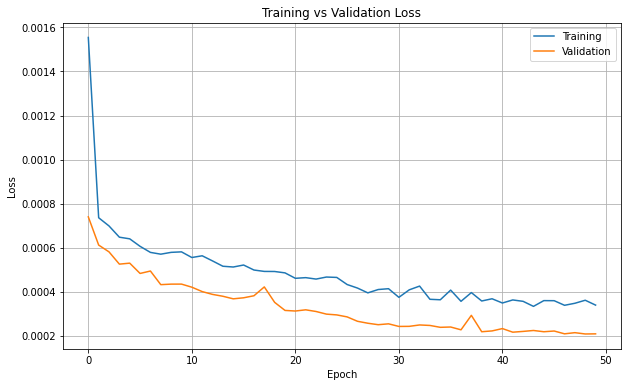

2020-08-10 18:00:11.236064: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-08-10 18:00:11.253589: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-10 18:00:11.254026: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 960M computeCapability: 5.0
coreClock: 1.176GHz coreCount: 5 deviceMemorySize: 1.96GiB deviceMemoryBandwidth: 74.65GiB/s
2020-08-10 18:00:11.254082: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-08-10 18:00:11.254098: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-08-10 18:00:11.320339: I tensorflow/stream_executor/platform/def

In [7]:
model = BC1(x_train.shape[1])
model.fit(x_train, y_train, w_train, x_val, y_val, w_val, 50)
model.plot_loss()

Accuracy: 0.8259892096670587


,0,1,macro avg,weighted avg
precision,0.996755,0.600961,0.798858,0.893401
recall,0.766987,0.992936,0.879961,0.825989
f1-score,0.866905,0.748751,0.807828,0.836051
support,0.530514,0.187494,0.718008,0.718008


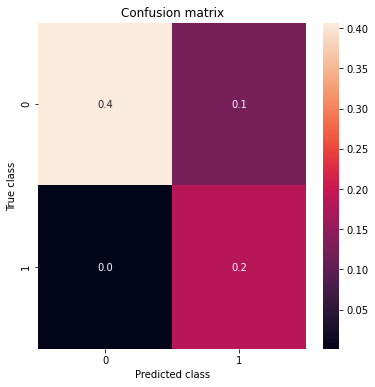

Accuracy: 0.7564943741304332


,0,1,macro avg,weighted avg
precision,0.933312,0.732309,0.832810,0.802214
recall,0.322905,0.987697,0.655301,0.756494
f1-score,0.479808,0.841043,0.660425,0.715412
support,0.532309,0.998274,1.530583,1.530583


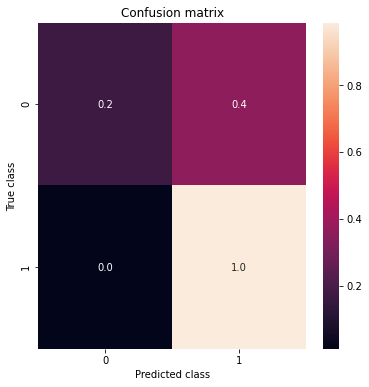

Accuracy: 0.7888740484183581


,0,1,macro avg,weighted avg
precision,0.950561,0.772072,0.861316,0.824896
recall,0.302346,0.993390,0.647868,0.788874
f1-score,0.458771,0.868859,0.663815,0.747492
support,0.655538,1.559477,2.215015,2.215015


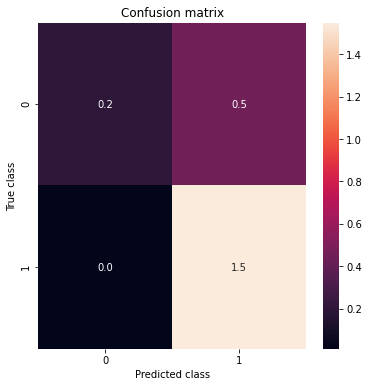

Accuracy: 0.8417169628720347


,0,1,macro avg,weighted avg
precision,0.888125,0.838478,0.863302,0.848851
recall,0.277298,0.990775,0.634037,0.841717
f1-score,0.422637,0.908287,0.665462,0.806826
support,0.487778,1.847002,2.334780,2.334780


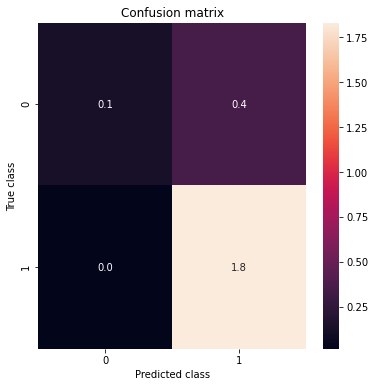

Accuracy: 0.9756003020593939


,0,1,macro avg,weighted avg
precision,0.889049,0.982644,0.935846,0.974880
recall,0.806519,0.990895,0.898707,0.975600
f1-score,0.845775,0.986752,0.916264,0.975057
support,0.178088,1.968723,2.146811,2.146811


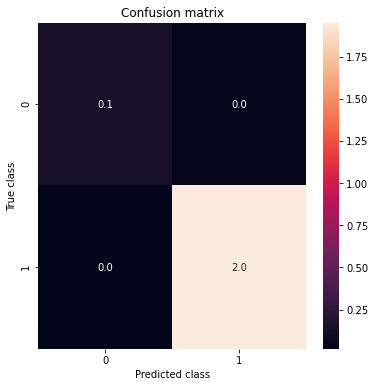

Accuracy: 0.9729068464269534


,0,1,macro avg,weighted avg
precision,0.945710,0.978027,0.961868,0.972587
recall,0.890146,0.989657,0.939902,0.972907
f1-score,0.917087,0.983808,0.950448,0.972577
support,0.392325,1.938392,2.330717,2.330717


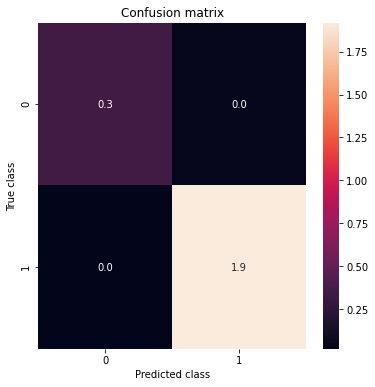

Accuracy: 0.9598242642272372


,0,1,macro avg,weighted avg
precision,0.979466,0.952879,0.966172,0.960607
recall,0.880244,0.992437,0.936341,0.959824
f1-score,0.927208,0.972256,0.949732,0.959161
support,0.633619,1.546116,2.179736,2.179736


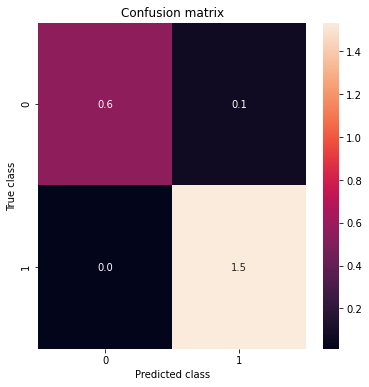

Accuracy: 0.9890629837185387


,0,1,macro avg,weighted avg
precision,0.969124,1.000061,0.984592,0.989404
recall,1.000114,0.983256,0.991685,0.989063
f1-score,0.984375,0.991587,0.987981,0.989103
support,0.476165,0.906135,1.382300,1.382300


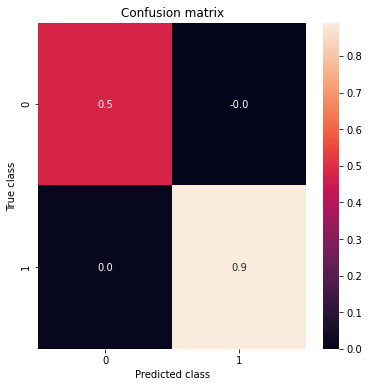

In [8]:
for mass in masses:
    display(HTML(f"<h2>Xtohh {mass} Tag 2</h2>"))
    x_test_mass = sets[mass]["x_test"]
    y_test_mass = sets[mass]["y_test"]
    w_test_mass = sets[mass]["w_test"]

    eval = model.complete_evaluation(
        x_test_mass, y_test_mass, w_test_mass, 0.4, save = False
    )

    print("Accuracy:", eval["weighted_accuracy"])
    display(pd.DataFrame(eval["weighted_class_report"]))
    plot_confidence_matrix(eval["weighted_cm"], 6, 6, '.1f')

In [13]:
model.save("../saved_models", "param_mass_ago2020")